## 3.1 Data profiling

### 3.1.1. Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

sns.set()

### 3.1.2. Import wrangled data

In [2]:
df = pd.read_csv('heart_wrangling.csv')

## 3.2 Identification and creation of features

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHRCat
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0


In [4]:
# Since 'MaxHR' has already been converted into numerical forms, we can drop the original column.

df.drop(['MaxHR'], axis=1, inplace = True)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHRCat
0,40,M,ATA,140,289,0,Normal,N,0.0,Up,0,0
1,49,F,NAP,160,180,0,Normal,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,N,0.0,Up,0,0
3,48,F,ASY,138,214,0,Normal,Y,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,N,0.0,Up,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   ExerciseAngina  746 non-null    object 
 8   Oldpeak         746 non-null    float64
 9   ST_Slope        746 non-null    object 
 10  HeartDisease    746 non-null    int64  
 11  MaxHRCat        746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 70.1+ KB


In [7]:
# 'Oldpeak' is ST depression induced by exercise relative to rest. Since we are not certain about the critical Oldpeak 
# values/range, we will keep the column as it is.

df['Oldpeak'].value_counts()

 0.0    317
 1.0     68
 2.0     58
 1.5     39
 3.0     23
 1.2     22
 0.2     19
 1.4     15
 1.8     15
 0.8     15
 0.6     14
 1.6     13
 0.5     12
 2.5     11
 0.1     10
 0.4     10
 0.3      9
 4.0      8
 1.9      7
 2.8      6
 2.6      6
 1.3      5
 1.7      5
 2.2      4
 3.6      4
 1.1      4
 0.9      3
 2.4      3
 3.4      3
 2.3      2
 3.5      2
 4.2      2
 3.2      2
 4.4      1
 5.0      1
 0.7      1
-0.1      1
 2.9      1
 6.2      1
 3.8      1
 5.6      1
 3.1      1
 2.1      1
Name: Oldpeak, dtype: int64

Similarly, we will keep 'Age','RestingBP' and 'Cholesterol' columns as they are since these are continuous features. Other categorical features will be one-hot encoded for further analysis.

## 3.3 Explore data relationships

### 3.3.1. Correlation between variables

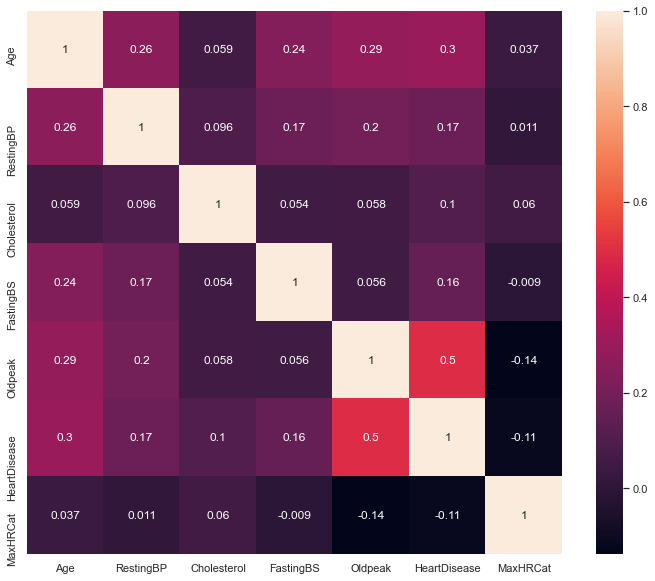

In [8]:
# Plot correlation heat map to realize relationships between various features.

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show();

Among numerical variables, Oldpeak (0.5) and Age (0.3) have a significant positive correlation with HeartDisease. 'Age' also has some correlation with 'Oldpeak', 'FastingBS', and 'RestingBP'.

### 3.3.2. 'HeartDisease' and categorical features

<Figure size 432x288 with 0 Axes>

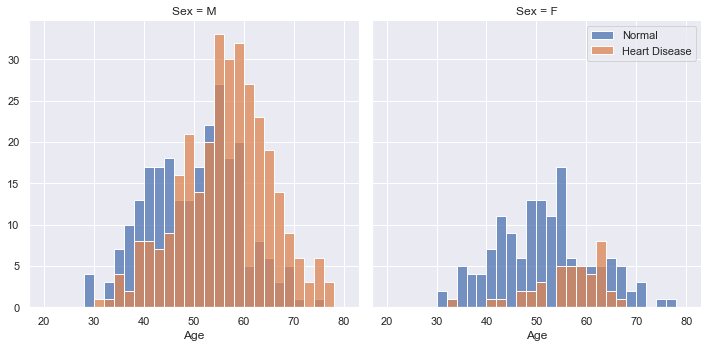

In [9]:
# Age, Sex, and heart disease

plt.figure()
g = sns.FacetGrid(df,  col="Sex", hue = 'HeartDisease', height = 5, sharex=True)
g.map(sns.histplot, 'Age', binwidth = 2, binrange = (20,80))
plt.legend(['Normal','Heart Disease'])
plt.show();

Men and women show different trends in this heart disease study. The fraction of men with a heart disease steadily goes up with age. However, less % of women have a heart disease than men across all age groups.

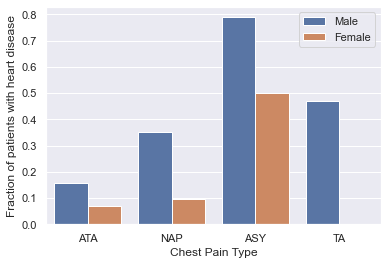

In [10]:
# Chest pain and heart disease

g = sns.barplot(x='ChestPainType', y='HeartDisease', hue='Sex', data=df, ci=None)
g.set_xlabel('Chest Pain Type')
g.set_ylabel('Fraction of patients with heart disease')
plt.legend(['Male','Female'])
plt.show();

Men show higher % of heart disease detection across all chest pain categories. The fraction is highest for asympomatic patients, both males and females. This means a large number of patients who did not show any chest pain were diagnosed with a heart disease. Patients with atypical angina (ATA) showed the lowest % of heart disease detection.

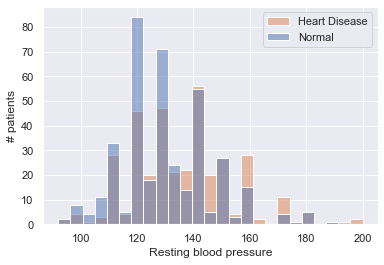

In [11]:
# Resting blood pressure and heart disease

g = sns.histplot(data=df[df.RestingBP > 50], x='RestingBP', hue='HeartDisease')
g.set_xlabel('Resting blood pressure')
g.set_ylabel('# patients')
plt.legend(['Heart Disease','Normal'])
plt.show();

A significant number patients diagnosed with heart disease reported blood pressure level < 150. This trend indicates a weak relationship between resting blood pressure and heart disease detection.

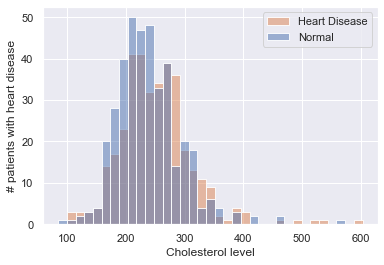

In [12]:
# Cholesterol level and heart disease

g = sns.histplot(data=df[df.Cholesterol > 50], x='Cholesterol', hue='HeartDisease')
g.set_xlabel('Cholesterol level')
g.set_ylabel('# patients with heart disease')
plt.legend(['Heart Disease','Normal'])
plt.show();

Many patients with a heart disease showed cholesterol levels < 240 (borderline high). However, as cholesterol levels increased, patients were more likely to be diagnosed with heart disease. A significant correlation between cholesterol level and heart disease diagnosis justifies the earlier decision of not using patients' medical records with missing cholesterol levels.

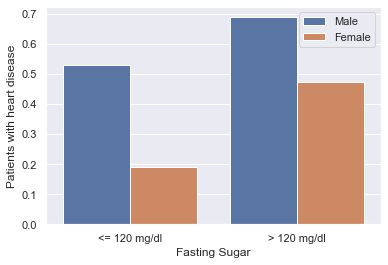

In [13]:
# Fasting blood sugar and heart disease

g = sns.barplot(x='FastingBS', y='HeartDisease', hue='Sex', data=df, ci=None)
g.set_xticklabels(['<= 120 mg/dl', '> 120 mg/dl'])
g.set_xlabel('Fasting Sugar')
g.set_ylabel('Patients with heart disease')
plt.legend(['Male', 'Female'])
plt.show();

Nearly 50% of males and 20% of females with blood sugar level <= 120 had heart disease detected. On the other hand, nearly 70% males and 45% females with blood sugar > 120 (diabetic) had heart disease detected.

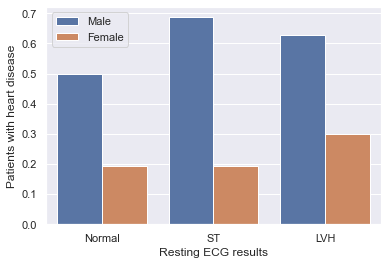

In [14]:
# Resting ECG and heart disease

g = sns.barplot(x='RestingECG', y='HeartDisease', hue='Sex', data=df, ci=None)
g.set_xlabel('Resting ECG results')
g.set_ylabel('Patients with heart disease')
plt.legend(['Male', 'Female'])
plt.show();

ST and LVH indicate abnormalities in the ECG. Patients with ECG abnormality show a greater percentage of heart disease detection. However, the fraction of females with heart disease is significantly lower than males across every ECG result type.

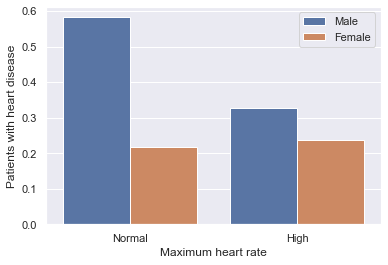

In [15]:
# Maximum heart rate and heart disease

g = sns.barplot(x='MaxHRCat', y='HeartDisease', hue='Sex', data=df, ci=None)
g.set_xticklabels(['Normal', 'High'])
g.set_xlabel('Maximum heart rate')
g.set_ylabel('Patients with heart disease')
plt.legend(['Male', 'Female'])
plt.show();

More than 50% of males with maximum heart rate within normal range had heart disease detected. On the other hand, about 32% of males with maximum heart rate higher than the normal range were diagnosed with a heart disease. In contrast, about 22-24% of females were diagnosed with a heart disease irrespective on their maximum heart rate.

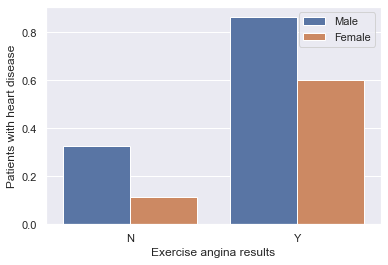

In [16]:
# Exercise angina and heart disease

g = sns.barplot(x='ExerciseAngina', y='HeartDisease', hue='Sex', data=df, ci=None)
g.set_xlabel('Exercise angina results')
g.set_ylabel('Patients with heart disease')
plt.legend(['Male', 'Female'])
plt.show();

Both males and females with exercise angina showed a higher % heart disease diagnois. There is a clear relationship between exercise angina and heart disease.

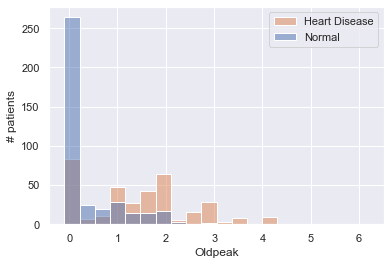

In [17]:
# Oldpeak value and heart disease

g = sns.histplot(data=df, x='Oldpeak', hue='HeartDisease')
g.set_xlabel('Oldpeak')
g.set_ylabel('# patients')
plt.legend(['Heart Disease', 'Normal'])
plt.show();

Nearly 50% of total patients' records showed either no or small ST depression (Oldpeak). At high oldpeak values (> 1) patients were more likely to be diagnosed with a heart disease.

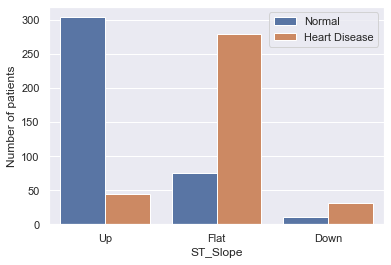

In [18]:
# ST_Slope' and heart disease

g = sns.countplot(data=df, x='ST_Slope', hue='HeartDisease')
g.set_xlabel('ST_Slope')
g.set_ylabel('Number of patients')
plt.legend(['Normal', 'Heart Disease'])
plt.show();

### 3.3.3 Feature Selection

In [19]:
# Determine the strength of correlation between various variables and output feature ('HeartDisease') using 'SelectKBest'

df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'MaxHRCat'],
      dtype='object')

In [20]:
# Separate numerical and categorical variables

cat_vars = ['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina','ST_Slope', 'MaxHRCat']
num_vars = ['Age', 'RestingBP', 'Cholesterol', 'Oldpeak']
df_cat = df[cat_vars]
df_num = df[num_vars]

In [21]:
df_cat.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,MaxHRCat
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,0
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,0
4,M,NAP,0,Normal,N,Up,0


In [22]:
# Create dummies of categorical variables

df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

,FastingBS,MaxHRCat,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0,0,1,1,0,0,1,0,0,0,1
1,0,0,0,0,1,0,1,0,0,1,0
2,0,0,1,1,0,0,0,1,0,0,1
3,0,0,0,0,0,0,1,0,1,1,0
4,0,0,1,0,1,0,1,0,0,0,1


In [23]:
# Combine numerical variables and dummies

df1 = pd.concat([df_num, df_dummies], axis=1)

In [24]:
# Determine 10 best features

best_features = SelectKBest(k=10)
fit = best_features.fit(df1,df.HeartDisease)

In [25]:
df1_scores = pd.DataFrame(fit.scores_)
df1_columns = pd.DataFrame(df1.columns)

In [26]:
feature_scores_K = pd.concat([df1_columns, df1_scores], axis=1)
feature_scores_K.columns = ['Feature', 'Score_K']
feature_scores_K.sort_values(by = 'Score_K', ascending=False)

,Feature,Score_K
14,ST_Slope_Up,555.337461
13,ST_Slope_Flat,400.502052
12,ExerciseAngina_Y,325.766789
3,Oldpeak,242.364279
7,ChestPainType_ATA,122.224882
0,Age,72.839116
6,Sex_M,69.754525
8,ChestPainType_NAP,38.621444
1,RestingBP,23.020309
4,FastingBS,19.696078


In [27]:
# Determine the strength of correlation between various variables and output feature using 'ExtraTreesClassifier'

model = ExtraTreesClassifier()
model.fit(df1,df.HeartDisease)

ExtraTreesClassifier()

In [28]:
feature_importances = pd.DataFrame(model.feature_importances_)

In [29]:
feature_scores_tree = pd.concat([df1_columns,feature_importances], axis=1)
feature_scores_tree.columns = ['Feature','Score_tree']
feature_scores_tree.sort_values(by = 'Score_tree', ascending=False)

,Feature,Score_tree
14,ST_Slope_Up,0.168323
13,ST_Slope_Flat,0.137299
12,ExerciseAngina_Y,0.125060
3,Oldpeak,0.099869
0,Age,0.080799
1,RestingBP,0.076340
2,Cholesterol,0.074106
6,Sex_M,0.055868
7,ChestPainType_ATA,0.045536
8,ChestPainType_NAP,0.035566


In [30]:
feature_scores_K['Score_tree'] = feature_scores_tree['Score_tree']
feature_scores_K.sort_values(['Score_K'], ascending=False)

,Feature,Score_K,Score_tree
14,ST_Slope_Up,555.337461,0.168323
13,ST_Slope_Flat,400.502052,0.137299
12,ExerciseAngina_Y,325.766789,0.125060
3,Oldpeak,242.364279,0.099869
7,ChestPainType_ATA,122.224882,0.045536
0,Age,72.839116,0.080799
6,Sex_M,69.754525,0.055868
8,ChestPainType_NAP,38.621444,0.035566
1,RestingBP,23.020309,0.076340
4,FastingBS,19.696078,0.019233


Feature impact scores determined using two methods (SelectKBest and ExtraTressClassifier) are in a different order for features with lower degree of impact. However, both methods have the same 3 features with highest degree of importance. These features are: ST_Slope, ExerciseAngina, and Oldpeak.

In [31]:
# Save data in a new '.csv' file

df.to_csv('heart_EDA.csv', index=False)